In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #  for avoid unwanted warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML # for HTMl tag use in python

In [2]:
pd.set_option('display.max_columns',None) # to show maximum number of columns

In [3]:
data = pd.read_csv(r'train.csv')
data1 = pd.read_csv(r'test.csv')

In [4]:
data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print('Total No Of ROWs =',data.shape[0])
print('Total No Of COLUMNs =',data.shape[1])

Total No Of ROWs = 1460
Total No Of COLUMNs = 81


### All column's unique values show with upto 15 unique values

In [6]:
allcol = data.nunique().sort_values().keys() # all column sort by their unique values

In [7]:
sapret_column=[]
for i in range(len(allcol)):
    a=data[allcol[i]].value_counts()
    if len(a) >= 15:
        break;
    sapret_column.append(allcol[i])
    display(HTML(f'---------------- <b>  {allcol[i]}  </b> ----------------'))
    print(a)

Y    1365
N      95
Name: CentralAir, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64


Grvl    50
Pave    41
Name: Alley, dtype: int64


0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


0    913
1    535
2     12
Name: HalfBath, dtype: int64


Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64


2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64


0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64


MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64


1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64


3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


### plot above unique values

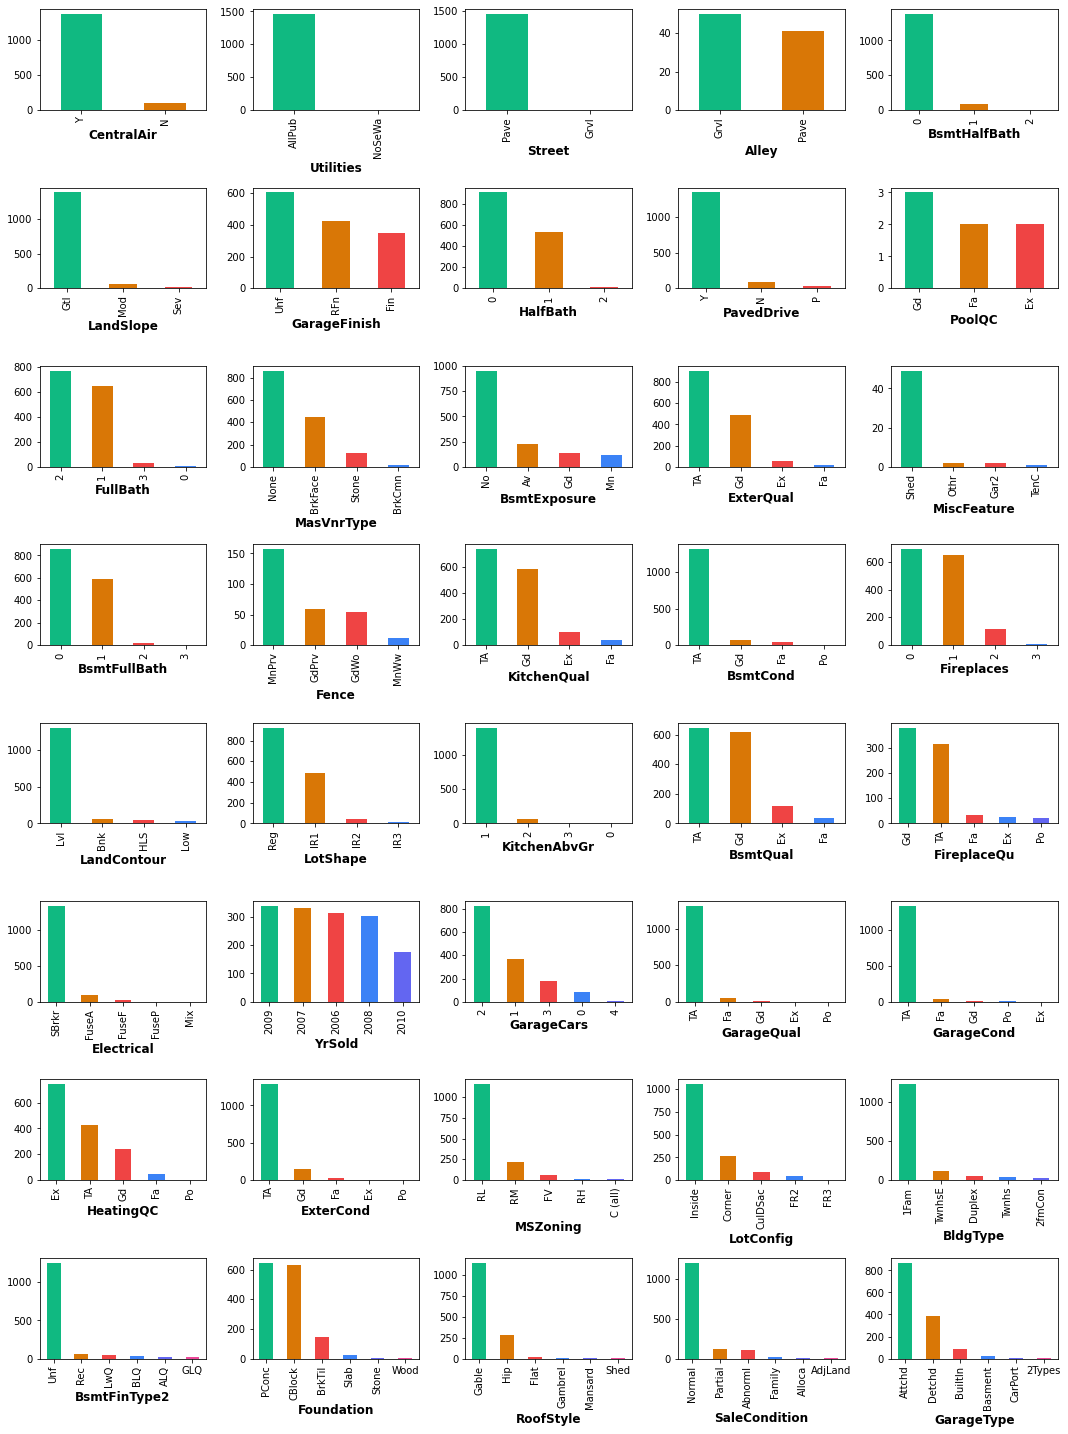

In [8]:
plt.figure(figsize=(15,20))
for i in range(len(sapret_column)):
    if i == 40:
        break;
    plt.subplot(8,5,i+1)
    plt.tight_layout() # for maintain spaceing between multple graphs
    plt.xlabel(sapret_column[i],fontsize=12.0,fontweight='bold') 
    data[sapret_column[i]].value_counts().plot(kind="bar", color = ['#10B981','#D97706','#EF4444','#3B82F6','#6366F1','#EC4899'])  
#   sns.countplot(data=dataset,x=col_key[i])

### How many missing value

In [9]:
a = round((data.isnull().mean()*100),2)
mssingcolumn=[]
missingdata=[]
missingnum=[]
for i in range(len(a)):
    if a.values[i] != 0:
        mssingcolumn.append(a.keys()[i])
for i in mssingcolumn:
    missingdata.append(round((data[i].isnull().mean()*100),2))
    missingnum.append(data[i].isnull().sum())
missing=pd.DataFrame({'column':mssingcolumn,'missing percent':missingdata,'missing num':missingnum}) 
missing

,column,missing percent,missing num
0,LotFrontage,17.74,259
1,Alley,93.77,1369
2,MasVnrType,0.55,8
3,MasVnrArea,0.55,8
4,BsmtQual,2.53,37
5,BsmtCond,2.53,37
6,BsmtExposure,2.60,38
7,BsmtFinType1,2.53,37
8,BsmtFinType2,2.60,38
9,Electrical,0.07,1


### all missing data scatter plot

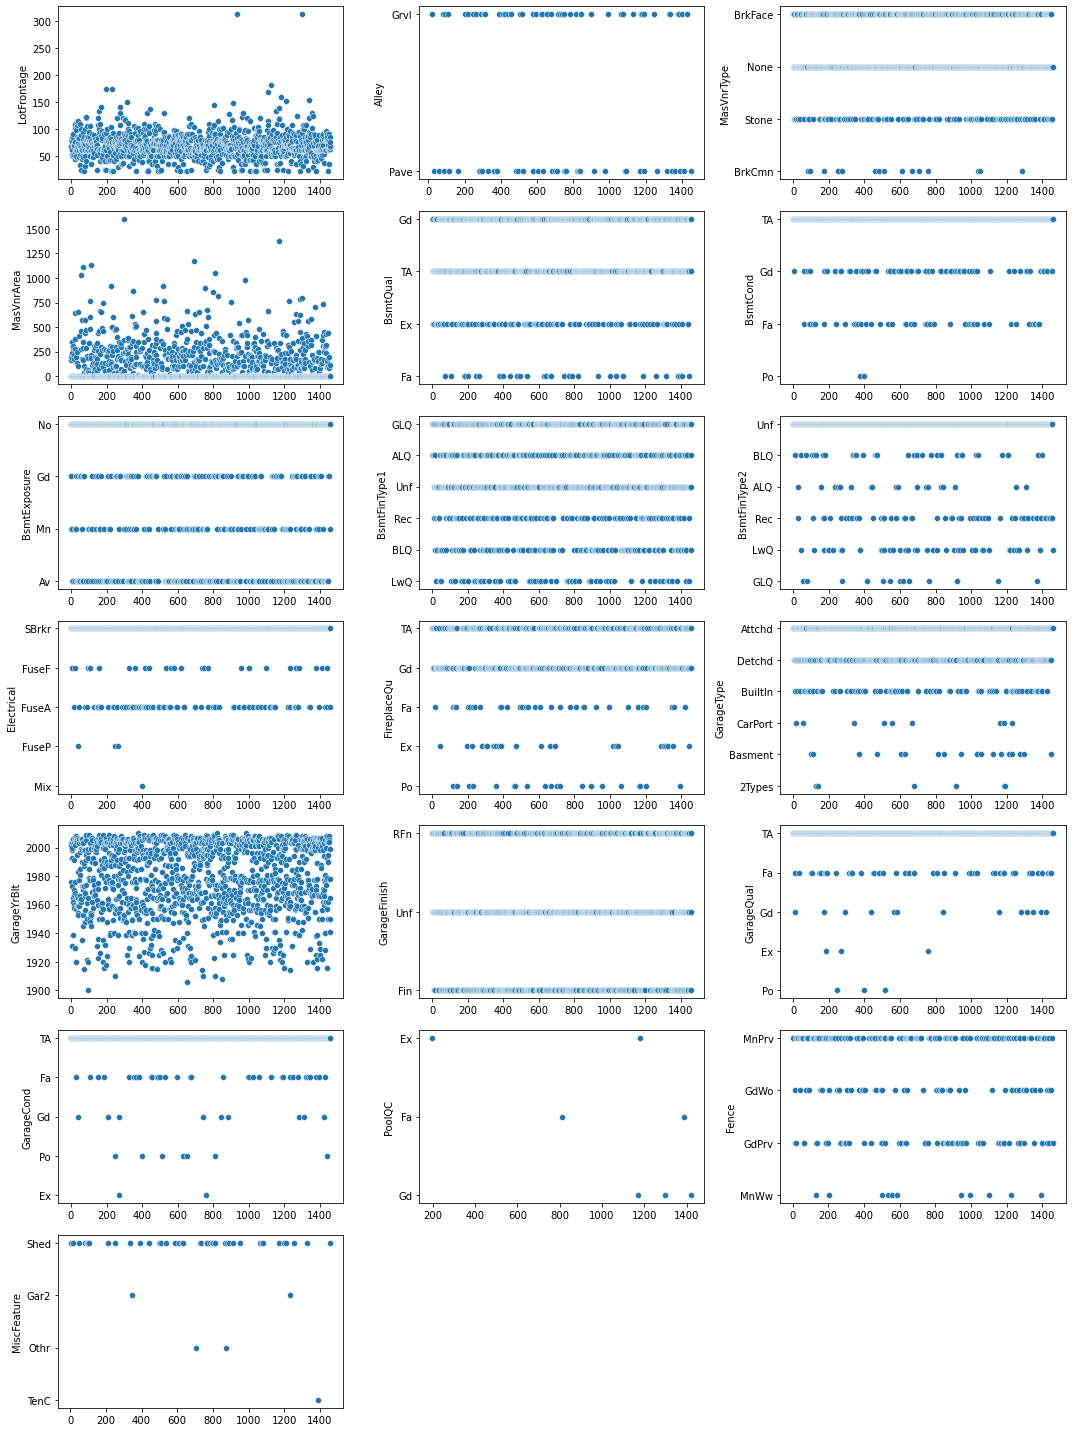

In [10]:
plt.figure(figsize=(15,20))
for i in range(len(mssingcolumn)):
    plt.subplot((len(mssingcolumn)/3)+1,3,i+1) 
    plt.tight_layout()
    sns.scatterplot(x=data.index , y=data[mssingcolumn[i]])

### All missing values show with heatmap

<AxesSubplot:>

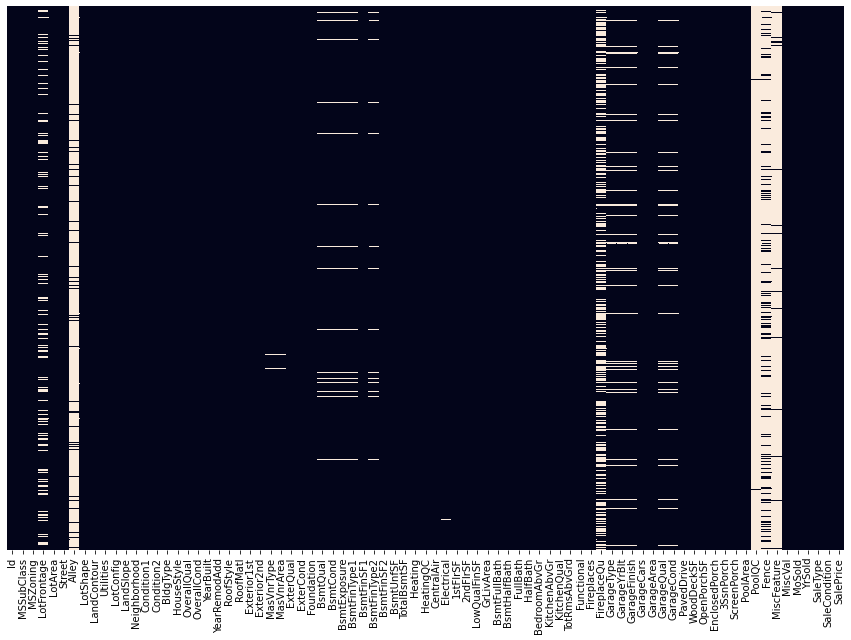

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

# Outliers Handle And Delete Them

### Detect  All outliers wrt of SalesPrice 

In [12]:
# it all are have numeric values
outlier_col = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

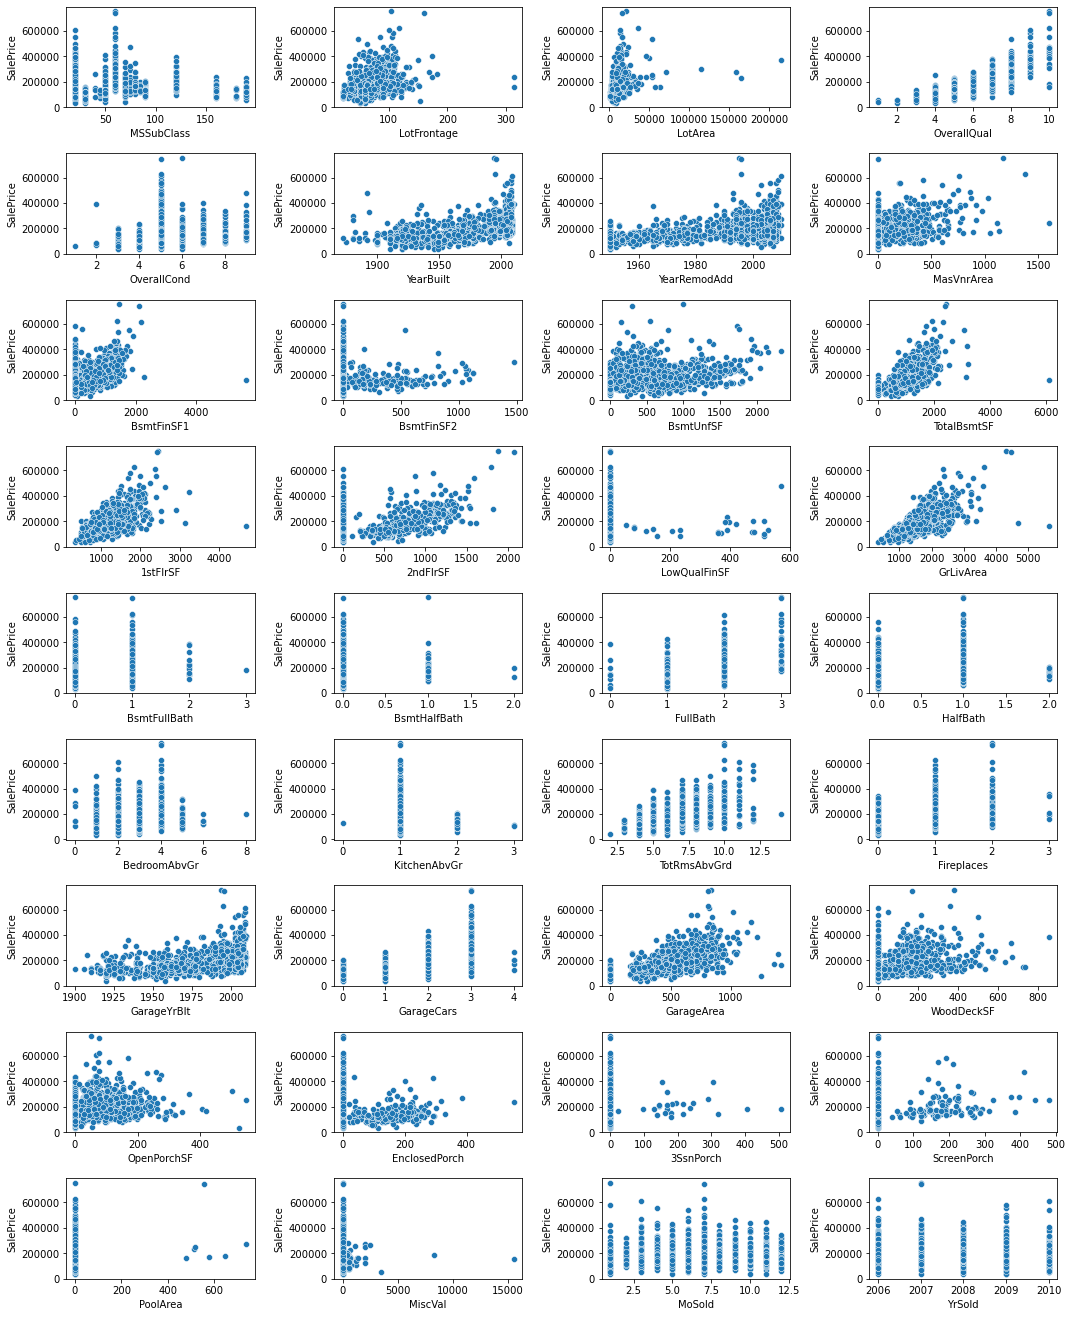

In [13]:
plt.figure(figsize=(15,20))
for i in range(len(outlier_col)):
    plt.subplot((len(outlier_col)/4)+1,4,i+1) 
    plt.tight_layout()
    sns.scatterplot(x=data[outlier_col[i]],y=data['SalePrice'])
    plt.xlabel(outlier_col[i])
    plt.ylabel('SalePrice')

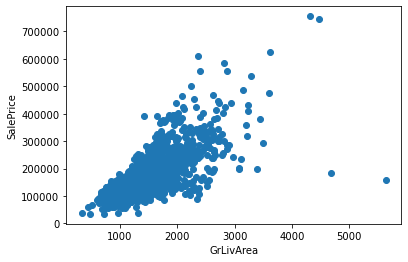

In [14]:
plt.scatter(x=data['GrLivArea'],y=data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [15]:
# delete outliners
data = data.drop(data[data['GrLivArea']>4000].index)

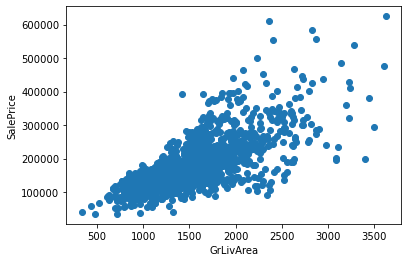

In [16]:
# outlier deleted
plt.scatter(x=data['GrLivArea'],y=data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

### Delete All outliers wrt of SalesPrice like above code had done

In [17]:
# delete from LotFrontage
data = data.drop(data[data['LotFrontage']>200].index)

In [18]:
# delete from LotArea
data = data.drop(data[data['LotArea']>100000].index)

In [19]:
# delete from MasVnrArea
data = data.drop(data[data['MasVnrArea']>1200].index)

In [20]:
# delete from BsmtFinSF2
data = data.drop(data[data['BsmtFinSF2']>1200].index)

In [21]:
# delete from TotalBsmtSF
data = data.drop(data[data['TotalBsmtSF']>2800].index)

In [22]:
# delete from OpenPorchSF
data = data.drop(data[data['OpenPorchSF']>380].index)

In [23]:
# delete from EnclosedPorch
data = data.drop(data[data['EnclosedPorch']>380].index)

In [24]:
# delete from 3SsnPorch
data = data.drop(data[data['3SsnPorch']>2].index)

In [25]:
# delete from ScreenPorch
data = data.drop(data[data['ScreenPorch']>2].index)

In [26]:
# delete from PoolArea
data = data.drop(data[data['PoolArea']>200].index)

In [27]:
# delete from MiscVal
data = data.drop(data[data['MiscVal']>6000].index)

## All possible outliers deleted

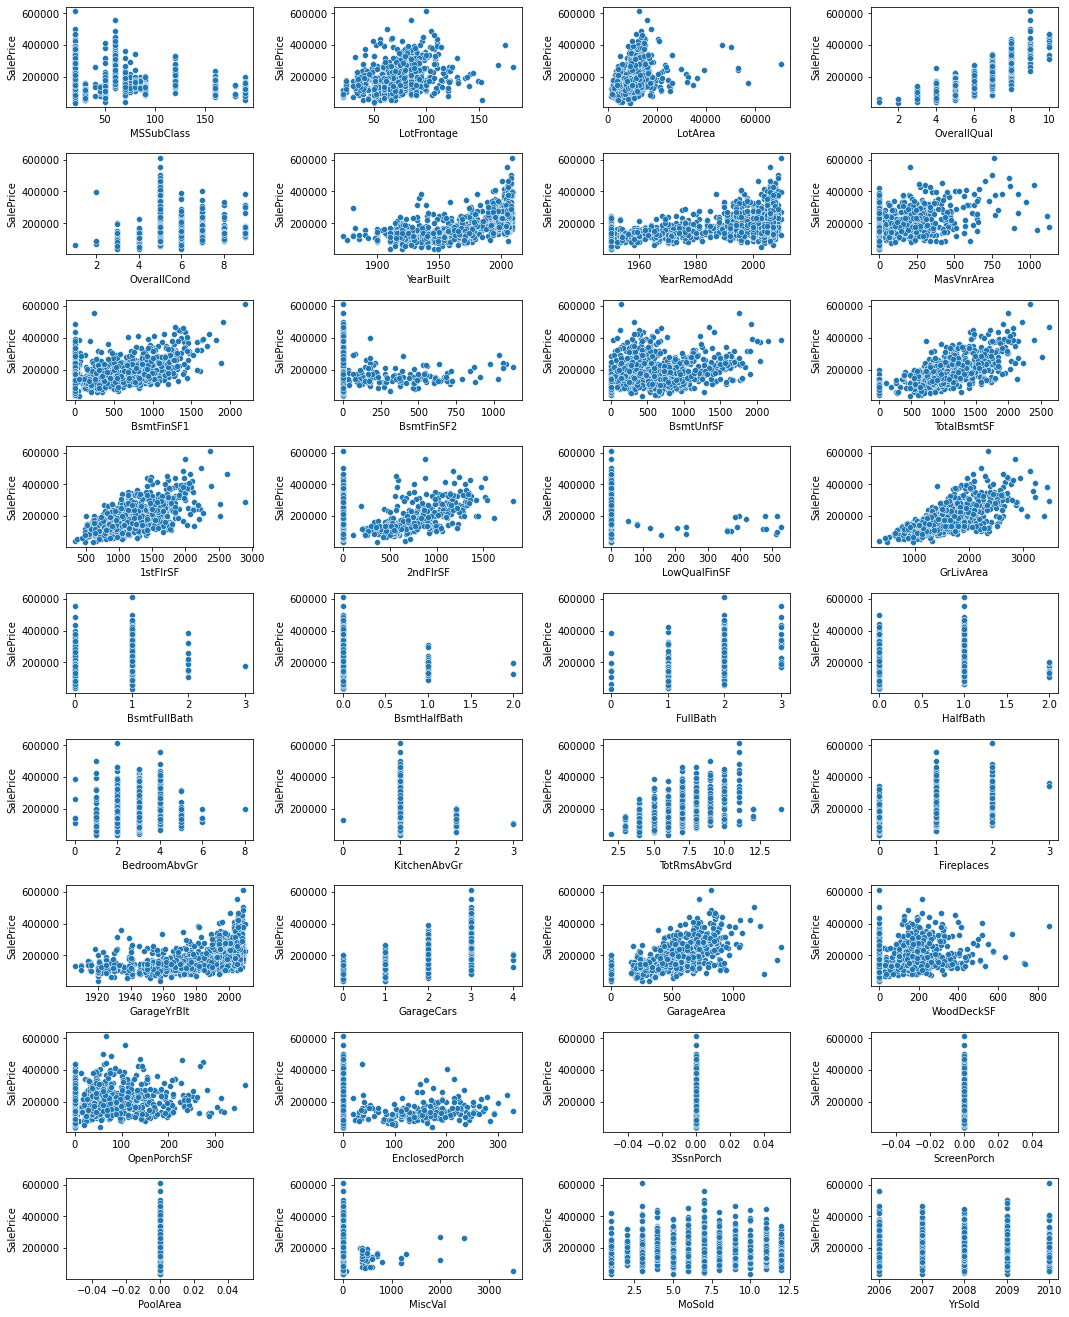

In [28]:
plt.figure(figsize=(15,20))
for i in range(len(outlier_col)):
    plt.subplot((len(outlier_col)/4)+1,4,i+1) 
    plt.tight_layout()
    sns.scatterplot(x=data[outlier_col[i]],y=data['SalePrice'])
    plt.xlabel(outlier_col[i])
    plt.ylabel('SalePrice')

In [29]:
data1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

# Feature Enginering

In [30]:
ntrain = data.shape[0] # it look like x_train
ntest= data1.shape[0]  # it look like x_test
y_train = data.SalePrice.values # it look like y_train
# we have to calculate and submit to y_test 
alldata=pd.concat((data,data1)).reset_index(drop=True)
alldatacopy=alldata.copy() # copy alldata
alldata.drop(['SalePrice'],axis=1,inplace=True)
alldata.drop(['Id'],axis=1,inplace=True)
alldata.shape 

(2757, 79)

## Missing values of alldata conacated data

In [31]:
def alldata_missing():
    a = round((alldata.isnull().mean()*100),2)
    mssingcolumn=[]
    missingdata=[]
    missingnum=[] 
    for i in range(len(a)):
        if a.values[i] != 0:
            mssingcolumn.append(a.keys()[i])
    for i in mssingcolumn:
        missingdata.append(round((alldata[i].isnull().mean()*100),3))
        missingnum.append(alldata[i].isnull().sum())
    missing=pd.DataFrame({'column':mssingcolumn,'missing percent':missingdata,'missing num':missingnum}) 
    print(missing)
    
alldata_missing()

          column  missing percent  missing num
0       MSZoning            0.145            4
1    LotFrontage           16.395          452
2          Alley           92.963         2563
3      Utilities            0.073            2
4    Exterior1st            0.036            1
5    Exterior2nd            0.036            1
6     MasVnrType            0.871           24
7     MasVnrArea            0.834           23
8       BsmtQual            2.902           80
9       BsmtCond            2.938           81
10  BsmtExposure            2.938           81
11  BsmtFinType1            2.829           78
12    BsmtFinSF1            0.036            1
13  BsmtFinType2            2.829           78
14    BsmtFinSF2            0.036            1
15     BsmtUnfSF            0.036            1
16   TotalBsmtSF            0.036            1
17    Electrical            0.036            1
18  BsmtFullBath            0.073            2
19  BsmtHalfBath            0.073            2
20   KitchenQ

<AxesSubplot:>

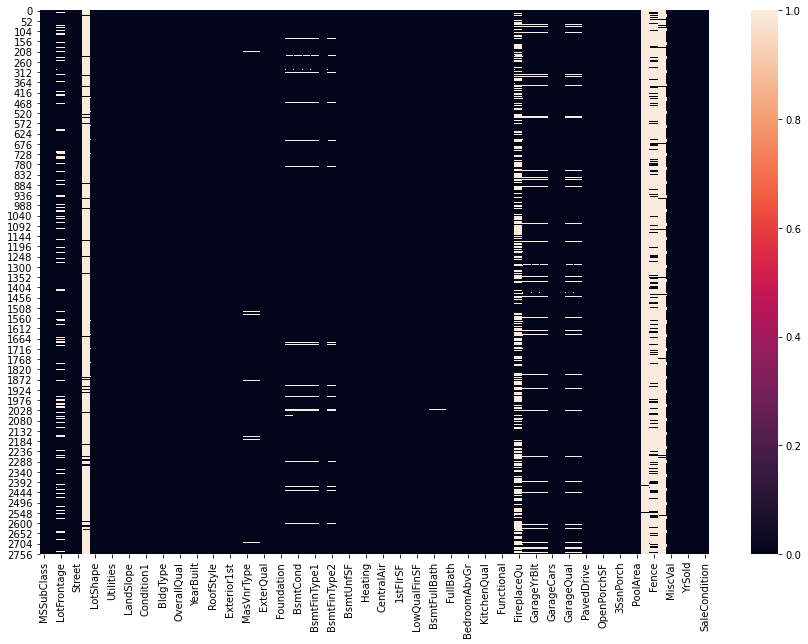

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(alldata.isnull())

# Delete missing data

In [33]:
# we fill none coz it have missing values more than 70%-99%
for i in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MSSubClass'):
    alldata[i]=alldata[i].fillna('none')

In [34]:
# we fill 0 coz, it have missing values between 7% - 0.5%
for i in ('GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrType','MasVnrArea'):
    alldata[i]=alldata[i].fillna(0)

In [35]:
# we fill with median values coz, it have very less data and our situtaion's demand
alldata['LotFrontage']=alldata.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [36]:
# we fill with mode or most freuqent data coz out situation demand and also very less data
alldata['MSZoning']=alldata['MSZoning'].fillna(alldata['MSZoning'].mode()[0])

In [37]:
# it does not help with our model coz, it have similar type data no variantion
alldata=alldata.drop(['Utilities'],axis=1)

In [38]:
# it have very less missing data but we could find what to fill so we would fill with typical
alldata['Functional']=alldata['Functional'].fillna('typical')

In [39]:
# we fill with mode or most freuqent data coz out situation demand and also very less data
for i in ('Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType'):
    alldata[i]=alldata[i].fillna(alldata[i].mode()[0])

### we have nothing missing data

In [40]:
alldata_missing() 

Empty DataFrame
Columns: [column, missing percent, missing num]
Index: []


In [41]:
# chnage to string values coz we have to perfomr labelencoding

alldata['MSSubClass']=alldata['MSSubClass'].apply(str)

for i in ('OverallCond','YrSold','MoSold'):
    alldata[i]=alldata[i].astype(str)

In [42]:
alldata 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,160,RM,21.0,1936,Pave,none,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,none,none,0.0,none,0.0,0.0,none,none,Y,0,0,0,0,0,0,none,none,none,0,6,2006,WD,Normal
2753,160,RM,21.0,1894,Pave,none,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,none,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,none,none,none,0,4,2006,WD,Abnorml
2754,20,RL,160.0,20000,Pave,none,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,none,none,none,0,9,2006,WD,Abnorml
2755,85,RL,62.0,10441,Pave,none,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970

In [43]:
finalalldata = alldata 

# We have to use Pipline From Below

#### step1

alldata

In [44]:
from sklearn.preprocessing import LabelEncoder
cols=('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
 
for i in cols:
    encodlb=LabelEncoder()
    encodlb.fit(list(alldata[i].values))
    alldata[i]=encodlb.transform(list(alldata[i].values))

alldata

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65.0,8450,1,2,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,3,3,2,706.0,5,0.0,150.0,856.0,GasA,0,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,5,Attchd,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,2,4,none,0,4,2,WD,Normal
1,5,RL,80.0,9600,1,2,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,3,1,0,978.0,5,0.0,284.0,1262.0,GasA,0,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,Attchd,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,2,4,none,0,7,1,WD,Normal
2,10,RL,68.0,11250,1,2,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,3,2,2,486.0,5,0.0,434.0,920.0,GasA,0,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,Attchd,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,2,4,none,0,11,2,WD,Normal
3,11,RL,60.0,9550,1,2,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,3,1,3,0,216.0,5,0.0,540.0,756.0,GasA,2,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,2,4,none,0,4,0,WD,Abnorml
4,10,RL,84.0,14260,1,2,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,3,0,2,655.0,5,0.0,490.0,1145.0,GasA,0,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,Attchd,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,2,4,none,0,3,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,2,RM,21.0,1936,1,2,3,Lvl,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,3,3,3,5,0.0,5,0.0,546.0,546.0,GasA,2,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,5,none,0.0,3,0.0,0.0,5,5,2,0,0,0,0,0,0,2,4,none,0,8,0,WD,Normal
2753,2,RM,21.0,1894,1,2,3,Lvl,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,3,3,3,4,252.0,5,0.0,294.0,546.0,GasA,4,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,5,CarPort,1970.0,2,1.0,286.0,4,4,2,0,24,0,0,0,0,2,4,none,0,6,0,WD,Abnorml
2754,5,RL,160.0,20000,1,2,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,6,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,3,0,1224.0,5,0.0,0.0,1224.0,GasA,0,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,4,Detchd,1960.0,2,2.0,576.0,4,4,2,474,0,0,0,0,0,2,4,none,0,11,0,WD,Abnorml
2755,14,RL,62.0,10441,1,2,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,SFoyer,5,4,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,4,PConc,2,3,0,2,337.0,5,0.0,575.0,912.0,GasA,4,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,5,none,0.0,3,0.0,0.0,5,5,2,80,32,0,0,0,0,2,2,Shed,700,9,0,WD,Normal


#### step2

alldata

In [45]:
# merge 3 column into 1 column
alldata['TotalSF']=alldata['TotalBsmtSF'] + alldata['1stFlrSF'] + alldata['2ndFlrSF']

### Handle Skewed Features , if we can't do then , it would complicated for our prediction model

#### step3
skewness

In [46]:
## Handle Skewed Features
from scipy.stats import skew 
numeric_feat = alldata.dtypes[alldata.dtypes != 'object'].index
skewed_feat = alldata[numeric_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feat})
skewness


Skew in numerical features: 



,Skew
PoolArea,27.781835
MiscVal,25.316317
3SsnPorch,17.274743
LowQualFinSF,12.377415
ScreenPorch,5.433924
LandSlope,5.058401
KitchenAbvGr,4.198036
BsmtFinSF2,4.176204
BsmtHalfBath,4.058833
EnclosedPorch,3.894252


#### step4

alldata

In [47]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    alldata[feat] = boxcox1p(alldata[feat], lam)

There are 59 skewed numerical features to Box Cox transform


#### step5
alldata 

In [48]:
alldata = pd.get_dummies(alldata)

# Finally we are goind to predict our model

In [49]:
alldata[:ntrain]

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_0,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,1.194318,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.540963,1.540963,1.194318,11.170327,2.055642,0.000000,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,2.055642,14.187527,0.730463,1.194318,10.506271,1.820334,1.820334,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,1.194318,1.820334,0.000000,1.820334,1.194318,14.976591,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [50]:
alldata[:ntest]

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_0,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,1.194318,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.540963,1.540963,1.194318,11.170327,2.055642,0.000000,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,2.055642,14.187527,0.730463,1.194318,10.506271,1.820334,1.820334,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,1.194318,1.820334,0.000000,1.820334,1.194318,14.976591,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [51]:
print(alldata[:ntrain].shape) # it look like x_train.shape
print(alldata[:ntest].shape) # it look like x_test.shape
print(y_train.shape)        # it look like y_train.shape
# print(y_test.shape)  # we have to find but later

(1298, 217)
(1459, 217)
(1298,)


<AxesSubplot:ylabel='Density'>

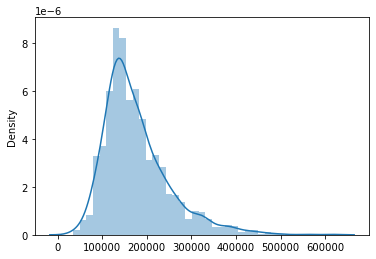

In [52]:
sns.distplot(y_train)

### We can see above chart   y_train data is skewd right side so we have to apply logrithm to normlize 

In [53]:
y_train = np.log(y_train)

<AxesSubplot:ylabel='Density'>

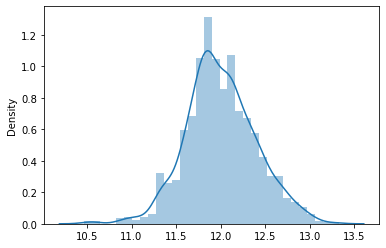

In [54]:
sns.distplot(y_train) 

In [55]:
#y_test find 
y_train
x_train = alldata[:ntrain]
x_test = alldata[:ntest]

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(1298, 217)
(1459, 217)
(1298,)


# Apply model Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
regressor_model = GradientBoostingRegressor(learning_rate=0.01,n_estimators=3000)
regressor_model.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=3000)

In [58]:
y_predict=regressor_model.predict(x_test)

In [59]:
y_predict = np.exp(y_predict)

In [60]:
y_predict

array([207359.06327606, 179383.52256654, 208225.98818736, ...,
       131122.76906092, 148194.8545039 , 138911.58376648])

In [61]:
import pickle

filename= 'finalized_model.pkl'
pickle.dump(regressor_model,open(filename,'wb'))

In [62]:
finalvalue = {'Id':[],'SalePrice':[]}
for i,j in zip(data1['Id'].values,y_predict):
    finalvalue['Id'].append(i)
    finalvalue['SalePrice'].append(j) 
finalvalue = pd.DataFrame(finalvalue)
finalvalue

,Id,SalePrice
0,1461,207359.063276
1,1462,179383.522567
2,1463,208225.988187
3,1464,149608.320004
4,1465,273882.369541
...,...,...
1454,2915,91657.710806
1455,2916,119437.880799
1456,2917,131122.769061
1457,2918,148194.854504
